In [1]:
!pip install -q git+https://github.com/huggingface/transformers.git datasets sentencepiece

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.2/492.2 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.9 MB/s eta 0:00:00


In [2]:
!pip install -q pytorch-lightning==1.9.5 wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 729.2/729.2 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.7/214.7 kB 23.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.6 MB/s eta 0:00:00


**Load dataset**

In [3]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) Y
Token is valid (permission: write).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' cr

In [4]:
from datasets import load_dataset

dataset = load_dataset("krvjanand/donut_training_sparrow_v1")

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/3 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1 [00:00<?, ? examples/s]

In [5]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'ground_truth'],
        num_rows: 3
    })
    validation: Dataset({
        features: ['image', 'ground_truth'],
        num_rows: 1
    })
    test: Dataset({
        features: ['image', 'ground_truth'],
        num_rows: 1
    })
})

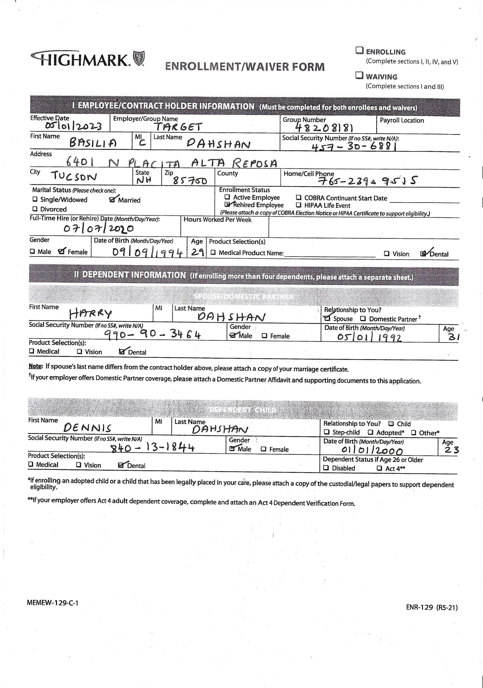

In [7]:
example = dataset['train'][1]
image = example['image']
# let's make the image a bit smaller when visualizing
width, height = image.size
display(image.resize((int(width*0.2), int(height*0.2))))

In [8]:
# let's load the corresponding JSON dictionary (as string representation)
ground_truth = example['ground_truth']
print(ground_truth)

{"gt_parse": {"effective_dt": "05/01/2023", "sub_first_name": "BASILIA", "sub_city": "TUCSON", "sub_hire_dt": "07/07/2020", "sub_gender": "Female", "sub_group_name": "TARGET", "sub_state": "NH", "sub_group_number": "48208181", "sub_ssn": "453-30-6881", "sub_phone": "765-239-9515", "sub_last_name": "PAHSHAN", "sub_address": "6401 N PLACITA ALTA REPDSA", "sub_enroll_sts": "Rehired Employee", "sub_zip": "85750", "spo_dob": "05/01/1992", "sub_age": "29", "spo_reln_cd": "Spouse", "spo_first_name": "HARRY", "spo_last_name": "DAHSHAN", "spo_gender": "Male", "spo_age": "31", "spo_ssn": "990- 90-3464", "chi_first_name": "DENNIS", "chi_product_type": "Dental", "chi_dob": "01/01/2000", "chi_last_name": "DAHSHAN", "chi_gender": "Male", "chi_age": "23", "chi_ssn": "840-13-1844"}}


In [9]:
from ast import literal_eval

literal_eval(ground_truth)['gt_parse']

{'effective_dt': '05/01/2023',
 'sub_first_name': 'BASILIA',
 'sub_city': 'TUCSON',
 'sub_hire_dt': '07/07/2020',
 'sub_gender': 'Female',
 'sub_group_name': 'TARGET',
 'sub_state': 'NH',
 'sub_group_number': '48208181',
 'sub_ssn': '453-30-6881',
 'sub_phone': '765-239-9515',
 'sub_last_name': 'PAHSHAN',
 'sub_address': '6401 N PLACITA ALTA REPDSA',
 'sub_enroll_sts': 'Rehired Employee',
 'sub_zip': '85750',
 'spo_dob': '05/01/1992',
 'sub_age': '29',
 'spo_reln_cd': 'Spouse',
 'spo_first_name': 'HARRY',
 'spo_last_name': 'DAHSHAN',
 'spo_gender': 'Male',
 'spo_age': '31',
 'spo_ssn': '990- 90-3464',
 'chi_first_name': 'DENNIS',
 'chi_product_type': 'Dental',
 'chi_dob': '01/01/2000',
 'chi_last_name': 'DAHSHAN',
 'chi_gender': 'Male',
 'chi_age': '23',
 'chi_ssn': '840-13-1844'}

**Load model and processor**

In [10]:
from transformers import VisionEncoderDecoderConfig

max_length = 768
image_size = [1280, 960]

# update image_size of the encoder
# during pre-training, a larger image size was used
config = VisionEncoderDecoderConfig.from_pretrained("naver-clova-ix/donut-base")
config.encoder.image_size = image_size # (height, width)
# update max_length of the decoder (for generation)
config.decoder.max_length = max_length
# TODO we should actually update max_position_embeddings and interpolate the pre-trained ones:
# https://github.com/clovaai/donut/blob/0acc65a85d140852b8d9928565f0f6b2d98dc088/donut/model.py#L602

In [11]:
from transformers import DonutProcessor, VisionEncoderDecoderModel, BartConfig

processor = DonutProcessor.from_pretrained("naver-clova-ix/donut-base")
model = VisionEncoderDecoderModel.from_pretrained("naver-clova-ix/donut-base", config=config)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


**Create PyTorch dataset**

In [12]:
import json
import random
from typing import Any, List, Tuple

import torch
from torch.utils.data import Dataset

added_tokens = []

class DonutDataset(Dataset):
    """
    DonutDataset which is saved in huggingface datasets format. (see details in https://huggingface.co/docs/datasets)
    Each row, consists of image path(png/jpg/jpeg) and gt data (json/jsonl/txt),
    and it will be converted into input_tensor(vectorized image) and input_ids(tokenized string).
    Args:
        dataset_name_or_path: name of dataset (available at huggingface.co/datasets) or the path containing image files and metadata.jsonl
        max_length: the max number of tokens for the target sequences
        split: whether to load "train", "validation" or "test" split
        ignore_id: ignore_index for torch.nn.CrossEntropyLoss
        task_start_token: the special token to be fed to the decoder to conduct the target task
        prompt_end_token: the special token at the end of the sequences
        sort_json_key: whether or not to sort the JSON keys
    """

    def __init__(
        self,
        dataset_name_or_path: str,
        max_length: int,
        split: str = "train",
        ignore_id: int = -100,
        task_start_token: str = "<s>",
        prompt_end_token: str = None,
        sort_json_key: bool = True,
    ):
        super().__init__()

        self.max_length = max_length
        self.split = split
        self.ignore_id = ignore_id
        self.task_start_token = task_start_token
        self.prompt_end_token = prompt_end_token if prompt_end_token else task_start_token
        self.sort_json_key = sort_json_key

        self.dataset = load_dataset(dataset_name_or_path, split=self.split)
        self.dataset_length = len(self.dataset)

        self.gt_token_sequences = []
        for sample in self.dataset:
            ground_truth = json.loads(sample["ground_truth"])
            if "gt_parses" in ground_truth:  # when multiple ground truths are available, e.g., docvqa
                assert isinstance(ground_truth["gt_parses"], list)
                gt_jsons = ground_truth["gt_parses"]
            else:
                assert "gt_parse" in ground_truth and isinstance(ground_truth["gt_parse"], dict)
                gt_jsons = [ground_truth["gt_parse"]]

            self.gt_token_sequences.append(
                [
                    self.json2token(
                        gt_json,
                        update_special_tokens_for_json_key=self.split == "train",
                        sort_json_key=self.sort_json_key,
                    )
                    + processor.tokenizer.eos_token
                    for gt_json in gt_jsons  # load json from list of json
                ]
            )

        self.add_tokens([self.task_start_token, self.prompt_end_token])
        self.prompt_end_token_id = processor.tokenizer.convert_tokens_to_ids(self.prompt_end_token)

    def json2token(self, obj: Any, update_special_tokens_for_json_key: bool = True, sort_json_key: bool = True):
        """
        Convert an ordered JSON object into a token sequence
        """
        if type(obj) == dict:
            if len(obj) == 1 and "text_sequence" in obj:
                return obj["text_sequence"]
            else:
                output = ""
                if sort_json_key:
                    keys = sorted(obj.keys(), reverse=True)
                else:
                    keys = obj.keys()
                for k in keys:
                    if update_special_tokens_for_json_key:
                        self.add_tokens([fr"<s_{k}>", fr"</s_{k}>"])
                    output += (
                        fr"<s_{k}>"
                        + self.json2token(obj[k], update_special_tokens_for_json_key, sort_json_key)
                        + fr"</s_{k}>"
                    )
                return output
        elif type(obj) == list:
            return r"<sep/>".join(
                [self.json2token(item, update_special_tokens_for_json_key, sort_json_key) for item in obj]
            )
        else:
            obj = str(obj)
            if f"<{obj}/>" in added_tokens:
                obj = f"<{obj}/>"  # for categorical special tokens
            return obj

    def add_tokens(self, list_of_tokens: List[str]):
        """
        Add special tokens to tokenizer and resize the token embeddings of the decoder
        """
        newly_added_num = processor.tokenizer.add_tokens(list_of_tokens)
        if newly_added_num > 0:
            model.decoder.resize_token_embeddings(len(processor.tokenizer))
            added_tokens.extend(list_of_tokens)

    def __len__(self) -> int:
        return self.dataset_length

    def __getitem__(self, idx: int) -> Tuple[torch.Tensor, torch.Tensor, torch.Tensor]:
        """
        Load image from image_path of given dataset_path and convert into input_tensor and labels
        Convert gt data into input_ids (tokenized string)
        Returns:
            input_tensor : preprocessed image
            input_ids : tokenized gt_data
            labels : masked labels (model doesn't need to predict prompt and pad token)
        """
        sample = self.dataset[idx]

        # inputs
        pixel_values = processor(sample["image"], random_padding=self.split == "train", return_tensors="pt").pixel_values
        pixel_values = pixel_values.squeeze()

        # targets
        target_sequence = random.choice(self.gt_token_sequences[idx])  # can be more than one, e.g., DocVQA Task 1
        input_ids = processor.tokenizer(
            target_sequence,
            add_special_tokens=False,
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt",
        )["input_ids"].squeeze(0)

        labels = input_ids.clone()
        labels[labels == processor.tokenizer.pad_token_id] = self.ignore_id  # model doesn't need to predict pad token
        # labels[: torch.nonzero(labels == self.prompt_end_token_id).sum() + 1] = self.ignore_id  # model doesn't need to predict prompt (for VQA)
        return pixel_values, labels, target_sequence

In [13]:
# we update some settings which differ from pretraining; namely the size of the images + no rotation required
# source: https://github.com/clovaai/donut/blob/master/config/train_cord.yaml
processor.feature_extractor.size = image_size[::-1] # should be (width, height)
processor.feature_extractor.do_align_long_axis = False

train_dataset = DonutDataset("krvjanand/donut_training_sparrow_v1", max_length=max_length,
                             split="train", task_start_token="<s_cord-v2>", prompt_end_token="<s_cord-v2>",
                             sort_json_key=False, # cord dataset is preprocessed, so no need for this
                             )

val_dataset = DonutDataset("krvjanand/donut_training_sparrow_v1", max_length=max_length,
                             split="validation", task_start_token="<s_cord-v2>", prompt_end_token="<s_cord-v2>",
                             sort_json_key=False, # cord dataset is preprocessed, so no need for this
                             )

/usr/local/lib/python3.10/dist-packages/transformers/models/donut/processing_donut.py:187: FutureWarning: `feature_extractor` is deprecated and will be removed in v5. Use `image_processor` instead.
  warnings.warn(


In [14]:
len(added_tokens)

78

In [15]:
len(processor.tokenizer)

57602

In [16]:
processor.tokenizer.vocab_size

57522

In [17]:
pixel_values, labels, target_sequence = train_dataset[0]

In [18]:
print(pixel_values.shape)

torch.Size([3, 1280, 960])


In [19]:
for id in labels.tolist()[:30]:
  if id != -100:
    print(processor.decode([id]))
  else:
    print(id)

<s_effective_dt>
05
/
01
/20
23
</s_effective_dt>
<s_sub_group_name>
STA
RB
UC
KS
</s_sub_group_name>
<s_sub_group_number>
47
28
91
91
</s_sub_group_number>
<s_sub_first_name>
BAR
RY
</s_sub_first_name>
<s_sub_mi>
C
</s_sub_mi>
<s_sub_last_name>
WA
TER
S


In [20]:
print(target_sequence)

<s_effective_dt>05/01/2023</s_effective_dt><s_sub_group_name>STARBUCKS</s_sub_group_name><s_sub_group_number>47289191</s_sub_group_number><s_sub_first_name>BARRY</s_sub_first_name><s_sub_mi>C</s_sub_mi><s_sub_last_name>WATERS</s_sub_last_name><s_sub_ssn>190-90-3464</s_sub_ssn><s_sub_address>9750 NW 33RD ST</s_sub_address><s_sub_city>CORAL SPRINGS</s_sub_city><s_sub_state>AZ</s_sub_state><s_sub_zip>33065-1910</s_sub_zip><s_sub_phone>765-239-9489</s_sub_phone><s_sub_marital_sts>Divorced</s_sub_marital_sts><s_sub_enroll_sts>Active Employee</s_sub_enroll_sts><s_sub_hire_dt>03/05/2020</s_sub_hire_dt><s_sub_hrs_worked>30</s_sub_hrs_worked><s_sub_gender>Male</s_sub_gender><s_sub_dob>03/01/1955</s_sub_dob><s_sub_age>68</s_sub_age><s_sub_product_type>Dental</s_sub_product_type><s_spo_first_name>PAOLA</s_spo_first_name><s_spo_mi>N</s_spo_mi><s_spo_last_name>WATERS</s_spo_last_name><s_spo_reln_cd>Domestic Partner</s_spo_reln_cd><s_spo_ssn>980-51-4189</s_spo_ssn><s_spo_gender>Female</s_spo_gender>

In [21]:
model.config.pad_token_id = processor.tokenizer.pad_token_id
model.config.decoder_start_token_id = processor.tokenizer.convert_tokens_to_ids(['<s_cord-v2>'])[0]

In [22]:
print("Pad token ID:", processor.decode([model.config.pad_token_id]))
print("Decoder start token ID:", processor.decode([model.config.decoder_start_token_id]))

Pad token ID: <pad>
Decoder start token ID: <s_cord-v2>


**Create PyTorch DataLoaders**

In [23]:
from torch.utils.data import DataLoader

# feel free to increase the batch size if you have a lot of memory
# I'm fine-tuning on Colab and given the large image size, batch size > 1 is not feasible
# Set num_workers=4
train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True, num_workers=4)
val_dataloader = DataLoader(val_dataset, batch_size=1, shuffle=False, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [24]:
batch = next(iter(train_dataloader))
pixel_values, labels, target_sequences = batch
print(pixel_values.shape)

torch.Size([1, 3, 1280, 960])


In [25]:
for id in labels.squeeze().tolist()[:30]:
  if id != -100:
    print(processor.decode([id]))
  else:
    print(id)

<s_effective_dt>
05
/
01
/20
23
</s_effective_dt>
<s_sub_first_name>
B
ASI
LIA
</s_sub_first_name>
<s_sub_city>
TU
C
SON
</s_sub_city>
<s_sub_hire_dt>
07
/
07
/
2020
</s_sub_hire_dt>
<s_sub_gender>
Fem
ale
</s_sub_gender>
<s_sub_group_name>
TAR


In [26]:
print(len(train_dataset))
print(len(val_dataset))

3
1


In [27]:
batch = next(iter(val_dataloader))
pixel_values, labels, target_sequences = batch
print(pixel_values.shape)

torch.Size([1, 3, 1280, 960])


In [28]:
print(target_sequences[0])

<s_sub_payroll_location>0124-2023</s_sub_payroll_location><s_effective_dt>05/01/2023</s_effective_dt><s_sub_first_name>COLBY</s_sub_first_name><s_sub_city>DUNCAN</s_sub_city><s_sub_gender>Male</s_sub_gender><s_sub_group_name>UNITED HEALTH GROUP</s_sub_group_name><s_sub_state>AL</s_sub_state><s_sub_group_number>01245729</s_sub_group_number><s_sub_ssn>757-78-5749</s_sub_ssn><s_sub_last_name>EISENBACH</s_sub_last_name><s_sub_zip>73533</s_sub_zip><s_sub_address>2115 DUNCAN REGIONAL LOOP</s_sub_address><s_sub_enroll_sts>Active Employee</s_sub_enroll_sts><s_sub_phone>765-239-9487</s_sub_phone><s_sub_hire_dt>06/16/2000</s_sub_hire_dt><s_sub_hrs_worked>40</s_sub_hrs_worked><s_sub_dob>01/01/1987</s_sub_dob><s_sub_age>36</s_sub_age><s_sub_product_type>Medical</s_sub_product_type></s>


**Define LightingModule**

In [29]:
from pathlib import Path
import re
from nltk import edit_distance
import numpy as np
import math

from torch.nn.utils.rnn import pad_sequence
from torch.optim.lr_scheduler import LambdaLR

import pytorch_lightning as pl
from pytorch_lightning.utilities import rank_zero_only


class DonutModelPLModule(pl.LightningModule):
    def __init__(self, config, processor, model):
        super().__init__()
        self.config = config
        self.processor = processor
        self.model = model

    def training_step(self, batch, batch_idx):
        pixel_values, labels, _ = batch

        outputs = self.model(pixel_values, labels=labels)
        loss = outputs.loss
        self.log_dict({"train_loss": loss}, sync_dist=True)
        return loss

    def validation_step(self, batch, batch_idx, dataset_idx=0):
        pixel_values, labels, answers = batch
        batch_size = pixel_values.shape[0]
        # we feed the prompt to the model
        decoder_input_ids = torch.full((batch_size, 1), self.model.config.decoder_start_token_id, device=self.device)

        outputs = self.model.generate(pixel_values,
                                   decoder_input_ids=decoder_input_ids,
                                   max_length=max_length,
                                   early_stopping=True,
                                   pad_token_id=self.processor.tokenizer.pad_token_id,
                                   eos_token_id=self.processor.tokenizer.eos_token_id,
                                   use_cache=True,
                                   num_beams=1,
                                   bad_words_ids=[[self.processor.tokenizer.unk_token_id]],
                                   return_dict_in_generate=True,)

        predictions = []
        for seq in self.processor.tokenizer.batch_decode(outputs.sequences):
            seq = seq.replace(self.processor.tokenizer.eos_token, "").replace(self.processor.tokenizer.pad_token, "")
            seq = re.sub(r"<.*?>", "", seq, count=1).strip()  # remove first task start token
            predictions.append(seq)

        scores = list()
        for pred, answer in zip(predictions, answers):
            pred = re.sub(r"(?:(?<=>) | (?=</s_))", "", pred)
            # NOT NEEDED ANYMORE
            # answer = re.sub(r"<.*?>", "", answer, count=1)
            answer = answer.replace(self.processor.tokenizer.eos_token, "")
            scores.append(edit_distance(pred, answer) / max(len(pred), len(answer)))

            if self.config.get("verbose", False) and len(scores) == 1:
                print(f"Prediction: {pred}")
                print(f"    Answer: {answer}")
                print(f" Normed ED: {scores[0]}")

        return scores

    def validation_epoch_end(self, validation_step_outputs):
        # I set this to 1 manually
        # (previously set to len(self.config.dataset_name_or_paths))
        num_of_loaders = 1
        if num_of_loaders == 1:
            validation_step_outputs = [validation_step_outputs]
        assert len(validation_step_outputs) == num_of_loaders
        cnt = [0] * num_of_loaders
        total_metric = [0] * num_of_loaders
        val_metric = [0] * num_of_loaders
        for i, results in enumerate(validation_step_outputs):
            for scores in results:
                cnt[i] += len(scores)
                total_metric[i] += np.sum(scores)
            val_metric[i] = total_metric[i] / cnt[i]
            val_metric_name = f"val_metric_{i}th_dataset"
            self.log_dict({val_metric_name: val_metric[i]}, sync_dist=True)
        self.log_dict({"val_metric": np.sum(total_metric) / np.sum(cnt)}, sync_dist=True)

    def configure_optimizers(self):
        # TODO add scheduler
        optimizer = torch.optim.Adam(self.parameters(), lr=self.config.get("lr"))

        return optimizer

    def train_dataloader(self):
        return train_dataloader

    def val_dataloader(self):
        return val_dataloader

**Train**

In [30]:
# Set epochs = 30
# Set num_training_samples_per_epoch = training set size
config = {"max_epochs":30,
          "val_check_interval":0.4, # how many times we want to validate during an epoch
          "check_val_every_n_epoch":1,
          "gradient_clip_val":1.0,
          "num_training_samples_per_epoch": 425,
          "lr":3e-5,
          "train_batch_sizes": [8],
          "val_batch_sizes": [1],
          # "seed":2022,
          "num_nodes": 1,
          "warmup_steps": 81, # 425 / 8 = 54, 54 * 10 = 540, 540 * 0.15 = 81
          "result_path": "./result",
          "verbose": False,
          }

model_module = DonutModelPLModule(config, processor, model)

In [31]:
from pytorch_lightning.loggers import WandbLogger
from pytorch_lightning.callbacks import Callback

wandb_logger = WandbLogger(project="sparrow", name="invoices-donut-v5")

class PushToHubCallback(Callback):
    def on_train_epoch_end(self, trainer, pl_module):
        print(f"Pushing model to the hub, epoch {trainer.current_epoch}")
        pl_module.model.push_to_hub("krvjanand/donut_training_sparrow_v1",
                                    commit_message=f"Training in progress, epoch {trainer.current_epoch}")

    def on_train_end(self, trainer, pl_module):
        print(f"Pushing model to the hub after training")
        pl_module.processor.push_to_hub("krvjanand/donut_training_sparrow_v1",
                                    commit_message=f"Training done")
        pl_module.model.push_to_hub("krvjanand/donut_training_sparrow_v1",
                                    commit_message=f"Training done")

trainer = pl.Trainer(
        accelerator="gpu",
        devices=1,
        max_epochs=config.get("max_epochs"),
        val_check_interval=config.get("val_check_interval"),
        check_val_every_n_epoch=config.get("check_val_every_n_epoch"),
        gradient_clip_val=config.get("gradient_clip_val"),
        precision=16, # we'll use mixed precision
        num_sanity_val_steps=0,
        logger=wandb_logger,
        callbacks=[PushToHubCallback()],
)

trainer.fit(model_module)

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


INFO:pytorch_lightning.utilities.rank_zero:Using 16bit None Automatic Mixed Precision (AMP)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                      | Params
----------------------------------------------------
0 | model | VisionEncoderDecoderModel | 201 M 
----------------------------------------------------
201 M     Trainable params
0         Non-trainable params
201 M     Total params
403.862   Total estimated model params size (MB)
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/trainer.py:1609: PossibleUserWarning: The number of train

Training: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Validation: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1270: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation )
  warnings.warn(


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Pushing model to the hub, epoch 0


pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Pushing model to the hub, epoch 1


pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Pushing model to the hub, epoch 2


pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Pushing model to the hub, epoch 3


pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Pushing model to the hub, epoch 4


pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Pushing model to the hub, epoch 5


pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Pushing model to the hub, epoch 6


pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Pushing model to the hub, epoch 7


pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Pushing model to the hub, epoch 8


pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Pushing model to the hub, epoch 9


pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Pushing model to the hub, epoch 10


pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Pushing model to the hub, epoch 11


pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Pushing model to the hub, epoch 12


pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Pushing model to the hub, epoch 13


pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Pushing model to the hub, epoch 14


pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Pushing model to the hub, epoch 15


pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Pushing model to the hub, epoch 16


pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Pushing model to the hub, epoch 17


pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Pushing model to the hub, epoch 18


pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Pushing model to the hub, epoch 19


pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Pushing model to the hub, epoch 20


pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Pushing model to the hub, epoch 21


pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Pushing model to the hub, epoch 22


pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Pushing model to the hub, epoch 23


pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Pushing model to the hub, epoch 24


pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Pushing model to the hub, epoch 25


pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Pushing model to the hub, epoch 26


pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Pushing model to the hub, epoch 27


pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Pushing model to the hub, epoch 28


pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Pushing model to the hub, epoch 29


pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.


Pushing model to the hub after training


sentencepiece.bpe.model:   0%|          | 0.00/1.30M [00:00<?, ?B/s]

**Evaluation**

In [32]:
from transformers import DonutProcessor, VisionEncoderDecoderModel

processor = DonutProcessor.from_pretrained("krvjanand/donut_training_sparrow_v1")
model = VisionEncoderDecoderModel.from_pretrained("krvjanand/donut_training_sparrow_v1")

In [33]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!pip install -q donut-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 20.1 MB/s eta 0:00:00


In [34]:
import re
import json
import torch
from tqdm.auto import tqdm
import numpy as np

from donut import JSONParseEvaluator

from datasets import load_dataset

device = "cuda" if torch.cuda.is_available() else "cpu"

model.eval()
model.to(device)

output_list = []
accs = []

dataset = load_dataset("krvjanand/donut_training_sparrow_v1", split="test")

for idx, sample in tqdm(enumerate(dataset), total=len(dataset)):
    # prepare encoder inputs
    pixel_values = processor(sample["image"].convert("RGB"), return_tensors="pt").pixel_values
    pixel_values = pixel_values.to(device)
    # prepare decoder inputs
    task_prompt = "<s_cord-v2>"
    decoder_input_ids = processor.tokenizer(task_prompt, add_special_tokens=False, return_tensors="pt").input_ids
    decoder_input_ids = decoder_input_ids.to(device)

    # autoregressively generate sequence
    outputs = model.generate(
            pixel_values,
            decoder_input_ids=decoder_input_ids,
            max_length=model.decoder.config.max_position_embeddings,
            early_stopping=True,
            pad_token_id=processor.tokenizer.pad_token_id,
            eos_token_id=processor.tokenizer.eos_token_id,
            use_cache=True,
            num_beams=1,
            bad_words_ids=[[processor.tokenizer.unk_token_id]],
            return_dict_in_generate=True,
        )

    # turn into JSON
    seq = processor.batch_decode(outputs.sequences)[0]
    seq = seq.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
    seq = re.sub(r"<.*?>", "", seq, count=1).strip()  # remove first task start token
    seq = processor.token2json(seq)

    ground_truth = json.loads(sample["ground_truth"])
    ground_truth = ground_truth["gt_parse"]
    evaluator = JSONParseEvaluator()
    score = evaluator.cal_acc(seq, ground_truth)

    accs.append(score)
    output_list.append(seq)

scores = {"accuracies": accs, "mean_accuracy": np.mean(accs)}
print(scores, f"length : {len(accs)}")

  0%|          | 0/1 [00:00<?, ?it/s]

{'accuracies': [0.14516129032258063], 'mean_accuracy': 0.14516129032258063} length : 1


In [35]:
print("Mean accuracy:", np.mean(accs))

Mean accuracy: 0.14516129032258063


In [38]:
print(f"Output:{seq}\n, Ground Truth: {ground_truth}")

Output:{'effective_dt': '05/01/2023', 'sub_address': '3RD ST', 'sub_zip': '34743', 'sub_hire_dt': '12/01/1999', 'sub_product_type': 'Dental', 'sub_gender': 'Male'}
, Ground Truth: {'effective_dt': '05/01/2023', 'sub_group_name': 'UK NATIONAL HEALTH SERVICE', 'sub_group_number': '16183919', 'sub_first_name': 'DAVID', 'sub_mi': 'G', 'sub_last_name': 'RIZZUTO', 'sub_ssn': '114-91-3731', 'sub_address': '732 N 3RD ST', 'sub_city': 'LEESBURG', 'sub_state': 'NC', 'sub_zip': '34748', 'sub_county': 'USA', 'sub_phone': '765-239-9519', 'sub_marital_sts': 'Divorced', 'sub_enroll_sts': 'Active Employee', 'sub_hire_dt': '12/06/1999', 'sub_gender': 'Male', 'sub_dob': '12/11/1955', 'sub_age': '68', 'sub_product_type': 'Dental', 'spo_first_name': 'JACKIE', 'spo_last_name': 'RIZZUTO', 'spo_reln_cd': 'Spouse', 'spo_ssn': '980-51-4189', 'spo_gender': 'Female', 'spo_dob': '07/25/1760', 'spo_age': '60', 'spo_product_type': 'Dental', 'chi_first_name': 'KATHLEEN', 'chi_last_name': 'RIZZUTO', 'chi_reln_cd': 'C